# A. Data Pipeline Section

In [139]:
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np 
import joblib
import os
import yaml

In [94]:
params_dir = "config/config.yaml"

In [95]:
def load_params(param_dir):
    with open(param_dir, 'r') as file:
        params = yaml.safe_load(file)
        
    return params

In [96]:
params = load_params(params_dir)

In [97]:
params

{'raw_dataset_dir': 'C:/Users/Axel/Desktop/Data Science/Telecom Prediction/data/raw/',
 'raw_dataset_path': 'C:/Users/Axel/Desktop/Data Science/Telecom Prediction/data/processed/raw_dataset.pkl',
 'cleaned_raw_dataset_path': 'C:/Users/Axel/Desktop/Data Science/Telecom Prediction/data/processed/raw_dataset.pkl',
 'train_set_path': ['C:/Users/Axel/Desktop/Data Science/Telecom Prediction/data/processed/x_train.pkl',
  'C:/Users/Axel/Desktop/Data Science/Telecom Prediction/data/processed/y_train.pkl'],
 'valid_set_path': ['C:/Users/Axel/Desktop/Data Science/Telecom Prediction/data/processed/x_valid.pkl',
  'C:/Users/Axel/Desktop/Data Science/Telecom Prediction/data/processed/y_valid.pkl'],
 'test_set_path': ['C:/Users/Axel/Desktop/Data Science/Telecom Prediction/data/processed/x_test.pkl',
  'C:/Users/Axel/Desktop/Data Science/Telecom Prediction/data/processed/y_test.pkl'],
 'train_feng_set_path': ['C:/Users/Axel/Desktop/Data Science/Telecom Prediction/data/processed/x_train_feng.pkl',
  '

## 1. Data Collection

In [98]:
# fungsi untuk membaca nama file, memuat file, dan menggabungkan dataset
def read_dataset(dataset_dir):
    dataset = pd.DataFrame()

    for i in tqdm(os.listdir(dataset_dir)):
        dataset = pd.concat([pd.read_csv(dataset_dir + i), dataset])
    
    return dataset

In [99]:
# melakukan pembacaan nama file, memuat file, dan menggabungkan dataset
dataset = read_dataset(params["raw_dataset_dir"])

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.28it/s]


In [100]:
# cek kondisi dataset
dataset

,ID,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Churn
0,1,128,Ya,Ya,2.7,1,265.1,110,89,9.87,13.7,Tidak
1,2,107,Ya,Ya,3.7,1,161.6,123,82,9.78,13.7,Tidak
2,3,137,Ya,Tidak,0,0,243.4,114,52,6.06,12.2,Tidak
3,4,84,Tidak,Tidak,0,2,299.4,71,57,3.1,6.6,Tidak
4,5,75,Tidak,Tidak,0,3,166.7,113,41,7.42,10.1,Tidak
...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3329,192,Ya,Ya,2.67,2,156.2,77,71.7,10.78,9.9,Tidak
3329,3330,68,Ya,Tidak,0.34,3,231.1,57,56.4,7.67,9.6,Tidak
3330,3331,28,Ya,Tidak,0,2,180.8,109,56,14.44,14.1,Tidak
3331,3332,184,Tidak,Tidak,0,2,213.8,105,50,7.98,5,Tidak


In [101]:
# terdapat beberapa temuan disini:
# 1. index hanya terlihat sampai 154 padahal jumlah rows sampai 1070
# 2. tanggal hanya terlihat dari bulan 8 dan bulan 9

# harus diselidiki lebih lanjut

In [102]:
# reset index untuk mengatasi poin pertama
dataset.reset_index(inplace = True, drop = True)

In [103]:
# lakukan pengecekan hasil
dataset

,ID,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Churn
0,1,128,Ya,Ya,2.7,1,265.1,110,89,9.87,13.7,Tidak
1,2,107,Ya,Ya,3.7,1,161.6,123,82,9.78,13.7,Tidak
2,3,137,Ya,Tidak,0,0,243.4,114,52,6.06,12.2,Tidak
3,4,84,Tidak,Tidak,0,2,299.4,71,57,3.1,6.6,Tidak
4,5,75,Tidak,Tidak,0,3,166.7,113,41,7.42,10.1,Tidak
...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3329,192,Ya,Ya,2.67,2,156.2,77,71.7,10.78,9.9,Tidak
3329,3330,68,Ya,Tidak,0.34,3,231.1,57,56.4,7.67,9.6,Tidak
3330,3331,28,Ya,Tidak,0,2,180.8,109,56,14.44,14.1,Tidak
3331,3332,184,Tidak,Tidak,0,2,213.8,105,50,7.98,5,Tidak


In [104]:
# simpan dataset yang telah digabungkan
joblib.dump(dataset, "data/processed/dataset.pkl")

['data/processed/dataset.pkl']

## 2. Data Definition

In [105]:
# definisikan tipe data, range data serta penjelasan untuk tiap observasi (variabel)

## 3. Data Validation

In [106]:
# cek tipe data
dataset.dtypes

ID                  int64
AccountWeeks       object
ContractRenewal    object
DataPlan           object
DataUsage          object
CustServCalls      object
DayMins            object
DayCalls           object
MonthlyCharge      object
OverageFee         object
RoamMins           object
Churn              object
dtype: object

In [107]:
# dari pengecekan data terlihat bahwa semuanya adalah data objek (string), perlu diselidiki lebih lanjut

### 3.1. Range

In [108]:
# pengecekan cakupan data menjadi kacau jika tipe data tidak sesuai
dataset.describe()

,ID
count,3333.00000
mean,1667.00000
std,962.29855
min,1.00000
25%,834.00000
50%,1667.00000
75%,2500.00000
max,3333.00000


### 3.2. Dimensi Data

In [109]:
# dimensi data kemungkinan besar tidak terpengaruh, namun nanti kita kembali lagi
dataset.shape

(3333, 12)

### 3.3. Handling Columns ContractRenewal

In [110]:
# cek tipe data pada kolom ContractRenewal
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               3333 non-null   int64 
 1   AccountWeeks     3333 non-null   object
 2   ContractRenewal  3333 non-null   object
 3   DataPlan         3333 non-null   object
 4   DataUsage        3328 non-null   object
 5   CustServCalls    3333 non-null   object
 6   DayMins          3322 non-null   object
 7   DayCalls         3333 non-null   object
 8   MonthlyCharge    3333 non-null   object
 9   OverageFee       3324 non-null   object
 10  RoamMins         3333 non-null   object
 11  Churn            3333 non-null   object
dtypes: int64(1), object(11)
memory usage: 312.6+ KB


In [111]:
# ternyata ada kategori yang bukan numerik teks, yaitu '---', maka dari itu castingnya gagal
# kita akan melakukan replacing ke data '---' dengan suatu angka numerik, maka dari itu kita harus mencari angka yang unik untuk merepresentasikannya

In [112]:
# angka -1 merupakan nilai yang bisa digunakan karena tidak terdapat di semua kolom dalam dataset kita
# nilai pengganti tidak harus -1, bisa apapun yang penting dapat dengan mudah di bedakan dan unik
dataset[(dataset.eq("-1").any(1)) | (dataset.eq(-1).any(1))]

,ID,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Churn


In [113]:
# replace data teks dengan -1
# kita tidak bisa replace dengan NaN karena NaN tidak bisa di casting ke integer
dataset.AccountWeeks = dataset.AccountWeeks.replace("----", -1).astype(int)

### 3.4. Handling Column "DataUsage"

In [114]:
# ternyata ada kategori yang bukan numerik teks, yaitu '---', maka dari itu castingnya gagal
# kita akan melakukan replacing ke data '---' dengan suatu angka numerik, maka dari itu kita harus mencari angka yang unik untuk merepresentasikannya

In [115]:
# angka -1 merupakan nilai yang bisa digunakan karena tidak terdapat di semua kolom dalam dataset kita
# nilai pengganti tidak harus -1, bisa apapun yang penting dapat dengan mudah di bedakan dan unik
dataset[(dataset.eq("-1").any(1)) | (dataset.eq(-1).any(1))]

,ID,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Churn
49,50,-1,Ya,Ya,NaN,1,133.2,135,71.7,10.86,11,Tidak


In [116]:
# replace data teks dengan -1
# kita tidak bisa replace dengan NaN karena NaN tidak bisa di casting ke integer
dataset.DataUsage = dataset.DataUsage.replace("----", -1).astype(float)

In [117]:
# terdapat NaN, maka dari itu untuk sementara replace terlebih dahulu dengan -1 seperti data '---'
dataset.DataUsage.isna().sum()

5

In [118]:
# replacing NaN dengan -1
dataset.DataUsage.fillna(-1, inplace = True)

### 3.5. Handling Column "CustServCalls"

In [119]:
# angka -1 merupakan nilai yang bisa digunakan karena tidak terdapat di semua kolom dalam dataset kita
# nilai pengganti tidak harus -1, bisa apapun yang penting dapat dengan mudah di bedakan dan unik
dataset[(dataset.eq("-1").any(1)) | (dataset.eq(-1).any(1))]

,ID,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Churn
47,48,142,Ya,Tidak,-1.0,2,187,----,47.5,6.73,7.4,Tidak
48,49,119,Ya,Tidak,-1.0,5,159.1,114,47,11.57,8.8,Ya
49,50,-1,Ya,Ya,-1.0,1,133.2,135,71.7,10.86,11,Tidak
50,51,52,Ya,Tidak,-1.0,3,191.9,108,59.2,13.49,7.8,Tidak Tahu
51,52,60,Ya,Tidak,-1.0,1,220.6,57,56,10.56,6.8,Tidak Tahu
52,53,10,Ya,Tidak,-1.0,2,186.1,112,48,9.51,11.4,Tidak Tahu
67,68,113,Tidak,Tidak,-1.0,0,125.2,93,39,10.32,8.3,Tidak
73,74,90,Ya,Tidak,-1.0,1,203.4,146,54,11.34,7.3,Tidak Tahu
74,75,85,Ya,Tidak,-1.0,----,235.8,109,54,7.86,12,Tidak


In [120]:
# replace data teks dengan -1
# kita tidak bisa replace dengan NaN karena NaN tidak bisa di casting ke integer
dataset.CustServCalls = dataset.CustServCalls.replace("----", -1).astype(int)

### 3.6. Handling Column "DayMins"

In [121]:
# replace data teks dengan -1
# kita tidak bisa replace dengan NaN karena NaN tidak bisa di casting ke integer
dataset.DayMins = dataset.DayMins.replace("----", -1).astype(float)

In [122]:
# terdapat NaN, maka dari itu untuk sementara replace terlebih dahulu dengan -1 seperti data '---'
dataset.DayMins.isna().sum()

11

In [123]:
# replacing NaN dengan -1
dataset.DayMins.fillna(-1, inplace = True)

### 3.7. Handling Column "DayCalls"

In [124]:
# replace data teks dengan -1
# kita tidak bisa replace dengan NaN karena NaN tidak bisa di casting ke integer
dataset.DayCalls = dataset.DayCalls.replace("----", -1).astype(int)

### 3.8. Handling Column "MonthlyCharge"

In [125]:
# replace data teks dengan -1
# kita tidak bisa replace dengan NaN karena NaN tidak bisa di casting ke integer
dataset.MonthlyCharge = dataset.MonthlyCharge.replace("----", -1).astype(float)

### 3.9. Handling Column "OverageFee"

In [126]:
# replace data teks dengan -1
# kita tidak bisa replace dengan NaN karena NaN tidak bisa di casting ke integer
dataset.OverageFee = dataset.OverageFee.replace("----", -1).astype(float)

In [127]:
# terdapat NaN, maka dari itu untuk sementara replace terlebih dahulu dengan -1 seperti data '---'
dataset.OverageFee.isna().sum()

9

In [128]:
# replacing NaN dengan -1
dataset.OverageFee.fillna(-1, inplace = True)

### 3.10. Handling Column "RoamMins"

In [129]:
# replace data teks dengan -1
# kita tidak bisa replace dengan NaN karena NaN tidak bisa di casting ke integer
dataset.RoamMins = dataset.RoamMins.replace("----", -1).astype(float)

In [130]:
# semua tipe data sudah sesuai, bisa kita simpan agar nanti dapat digunakan kembali

In [131]:
joblib.dump(dataset, "data/processed/dataset_clean.pkl")

['data/processed/dataset_clean.pkl']

In [132]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int32  
 2   ContractRenewal  3333 non-null   object 
 3   DataPlan         3333 non-null   object 
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int32  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int32  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
 11  Churn            3333 non-null   object 
dtypes: float64(5), int32(3), int64(1), object(3)
memory usage: 273.5+ KB


## 4. Data Defense

In [133]:
def check_data(input_data, params):
    # check data types
    assert input_data.select_dtypes("int").columns.to_list() == params["int32_columns"], "an error occurs in int32 column(s)."
    assert input_data.select_dtypes("float").columns.to_list() == params["float64_columns"], "an error occurs in float64 column(s)."
    assert input_data.select_dtypes("object").columns.to_list() == params["object_columns"], "an error occurs in object column(s)."

    # check range of data
    assert set(input_data.ContractRenewal).issubset(set(params["range_ContractRenewal"])), "an error occurs in ContractRenewal range."
    assert set(input_data.DataPlan).issubset(set(params["range_DataPlan"])), "an error occurs in DataPlan range."
    assert set(input_data.Churn).issubset(set(params["range_Churn"])), "an error occurs in Churn range."
    assert input_data.ID.between(params["range_ID"][0], params["range_ID"][1]).sum() == len(input_data), "an error occurs in ID range."
    assert input_data.AccountWeeks.between(params["range_AccountWeeks"][0], params["range_AccountWeeks"][1]).sum() == len(input_data), "an error occurs in AccountWeeks range."
    assert input_data.DataUsage.between(params["range_DataUsage"][0], params["range_DataUsage"][1]).sum() == len(input_data), "an error occurs in DataUsage range."
    assert input_data.CustServCalls.between(params["range_CustServCalls"][0], params["range_CustServCalls"][1]).sum() == len(input_data), "an error occurs in CustServCalls range."
    assert input_data.DayMins.between(params["range_DayMins"][0], params["range_DayMins"][1]).sum() == len(input_data), "an error occurs in DayMins range."
    assert input_data.DayCalls.between(params["range_DayCalls"][0], params["range_DayCalls"][1]).sum() == len(input_data), "an error occurs in DayCalls range."
    assert input_data.MonthlyCharge.between(params["range_MonthlyCharge"][0], params["range_MonthlyCharge"][1]).sum() == len(input_data), "an error occurs in MonthlyCharge range."
    assert input_data.RoamMins.between(params["range_RoamMins"][0], params["range_RoamMins"][1]).sum() == len(input_data), "an error occurs in RoamMins range."

In [134]:
params["object_columns"]

['ContractRenewal', 'DataPlan', 'Churn']

In [135]:
dataset.select_dtypes("object").columns.to_list()

['ContractRenewal', 'DataPlan', 'Churn']

In [73]:
dataset.select_dtypes("object").columns.to_list()

['ContractRenewal', 'DataPlan', 'Churn']

In [74]:
params["object_columns"]

['ContractRenewal', 'DataPlan', 'Churn']

In [78]:
# jika tidak ada error berarti data sudah sesuai dengan desain kita
check_data(dataset, params)

In [140]:
x_train = joblib.load("data/processed/x_train.pkl")

AttributeError: Can't get attribute '_unpickle_block' on <module 'pandas._libs.internals' from 'C:\\Users\\Axel\\anaconda3\\lib\\site-packages\\pandas\\_libs\\internals.cp39-win_amd64.pyd'>

## 5. Data Splitting

In [441]:
# pisahkan data x dan y (x adalah fitur, y adalah label)
x = dataset[params["predictors"]].copy()
y = dataset.Churn.copy()

In [442]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AccountWeeks     3333 non-null   int32  
 1   ContractRenewal  3333 non-null   object 
 2   DataPlan         3333 non-null   object 
 3   DataUsage        3333 non-null   float64
 4   CustServCalls    3333 non-null   int32  
 5   DayMins          3333 non-null   float64
 6   DayCalls         3333 non-null   int32  
 7   MonthlyCharge    3333 non-null   float64
 8   OverageFee       3333 non-null   float64
 9   RoamMins         3333 non-null   float64
dtypes: float64(5), int32(3), object(2)
memory usage: 221.5+ KB


In [443]:
y.value_counts()

Tidak         2828
Ya             483
Tidak Tahu      22
Name: Churn, dtype: int64

In [444]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42, stratify = y)

In [445]:
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size = 0.5, random_state = 42, stratify = y_test)

In [446]:
joblib.dump(x_train, "data/processed/x_train.pkl")
joblib.dump(y_train, "data/processed/y_train.pkl")
joblib.dump(x_valid, "data/processed/x_valid.pkl")
joblib.dump(y_valid, "data/processed/y_valid.pkl")
joblib.dump(x_test, "data/processed/x_test.pkl")
joblib.dump(y_test, "data/processed/y_test.pkl")

['data/processed/y_test.pkl']

______________________________________________________________________________________________________________________________

# B. Exploratory Data Analysis Section

In [447]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scs
import joblib
import yaml
import matplotlib.pyplot as plt

## 1. Import Params

In [448]:
params_dir = "config/params.yaml"

In [449]:
def load_params(param_dir):
    with open(param_dir, 'r') as file:
        params = yaml.safe_load(file)
        
    return params

In [450]:
params = load_params(params_dir)

In [451]:
params

{'dataset_dir': 'data/raw/',
 'float64_columns': ['DataUsage',
  'DayMins',
  'MonthlyCharge',
  'OverageFee',
  'RoamMins'],
 'int32_columns': ['ID', 'AccountWeeks', 'CustServCalls', 'DayCalls'],
 'label': 'Churn',
 'label_categories': ['Tidak Tahu', 'Tidak', 'Ya'],
 'label_categories_new': ['Tidak', 'Ya'],
 'missing_value_AccountWeeks': {'Tidak': 101, 'Ya': 103},
 'missing_value_CustServCalls': 1,
 'missing_value_DataUsage': {'Tidak': 0.8882406471183009,
  'Ya': 0.5436498516320476},
 'missing_value_DayCalls': 101,
 'missing_value_DayMins': 179.63004735256132,
 'missing_value_MonthlyCharge': 53,
 'missing_value_OverageFee': 10.12,
 'missing_value_RoamMins': 10.12,
 'missing_value_co': 11,
 'missing_value_no2': 18,
 'missing_value_o3': 29,
 'missing_value_so2': 35,
 'object_columns': ['ContractRenewal', 'DataPlan', 'Churn'],
 'predictors': ['AccountWeeks',
  'ContractRenewal',
  'DataPlan',
  'DataUsage',
  'CustServCalls',
  'DayMins',
  'DayCalls',
  'MonthlyCharge',
  'OverageFee',


## 2. Load Train Set

In [453]:
x_train = joblib.load("data/processed/x_train.pkl")
y_train = joblib.load("data/processed/y_train.pkl")

In [454]:
x_train

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
1655,138,Yes,No,0.00,3,127.1,102,43.0,12.39,12.39
2713,116,Yes,Yes,1.62,2,183.6,138,65.2,10.19,10.19
111,103,Yes,No,0.00,2,185.0,117,51.0,11.17,11.17
305,196,Yes,No,0.00,2,234.0,109,61.0,12.48,12.48
3089,70,Yes,Yes,2.54,3,143.4,72,64.4,8.50,8.50
...,...,...,...,...,...,...,...,...,...,...
1889,91,Yes,No,0.00,1,153.0,123,38.0,7.06,7.06
2890,138,Yes,No,0.00,0,240.8,104,54.0,7.23,7.23
494,18,Yes,No,0.00,1,273.6,93,57.0,5.73,5.73
953,132,Yes,Yes,2.32,2,175.7,93,69.2,9.36,9.36


In [455]:
y_train

1655    Tidak
2713    Tidak
111     Tidak
305     Tidak
3089    Tidak
        ...  
1889       Ya
2890    Tidak
494     Tidak
953     Tidak
1678    Tidak
Name: Churn, Length: 2333, dtype: object

In [456]:
dataset = pd.concat([x_train, y_train], axis = 1)

In [457]:
dataset

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Churn
1655,138,Yes,No,0.00,3,127.1,102,43.0,12.39,12.39,Tidak
2713,116,Yes,Yes,1.62,2,183.6,138,65.2,10.19,10.19,Tidak
111,103,Yes,No,0.00,2,185.0,117,51.0,11.17,11.17,Tidak
305,196,Yes,No,0.00,2,234.0,109,61.0,12.48,12.48,Tidak
3089,70,Yes,Yes,2.54,3,143.4,72,64.4,8.50,8.50,Tidak
...,...,...,...,...,...,...,...,...,...,...,...
1889,91,Yes,No,0.00,1,153.0,123,38.0,7.06,7.06,Ya
2890,138,Yes,No,0.00,0,240.8,104,54.0,7.23,7.23,Tidak
494,18,Yes,No,0.00,1,273.6,93,57.0,5.73,5.73,Tidak
953,132,Yes,Yes,2.32,2,175.7,93,69.2,9.36,9.36,Tidak


## 3. EDA

### 3.1. Cek Missing Value

In [458]:
# ubah kembali nilai yang awalnya adalah -1 menjadi NaN
dataset.replace(-1, np.nan, inplace = True)

In [459]:
# cek null value
dataset.isnull().sum()

AccountWeeks        0
ContractRenewal     0
DataPlan            0
DataUsage           5
CustServCalls       1
DayMins            11
DayCalls            1
MonthlyCharge       1
OverageFee          8
RoamMins            8
Churn               0
dtype: int64

### 3.2. Cek Informasi Statistik

#### 3.2.1. Cek Skewness

In [460]:
# cek skewness
dataset.skew(numeric_only = True)

AccountWeeks     0.081265
DataUsage        1.246628
CustServCalls    1.061323
DayMins          0.002133
DayCalls        -0.148765
MonthlyCharge    0.550416
OverageFee      -0.019028
RoamMins        -0.019028
dtype: float64

In [461]:
# kolom DataUsage, CustSerCalls, MonthlyCharge > +- 0.5, maka dari itu kolom tersebut akan diimputasi dengan median
# kolom lainnya akan diimputasi dengan mean

#### 3.2.2. Pemisahan Dataset berdasarkan Kelas

In [462]:
# pisahkan menjadi 2 kelas untuk melihat apakah kita perlu melakukan imputasi berdasarkan kelas
dataset_churn = dataset[dataset.Churn == "Yes"].copy()
dataset_tidak_churn = dataset[dataset.Churn != "Yes"].copy()

In [463]:
# kelas 1
dataset_churn.describe()

,AccountWeeks,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [464]:
# kelas 0
dataset_tidak_churn.describe()

,AccountWeeks,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,2333.000000,2328.000000,2332.000000,2322.000000,2332.000000,2332.000000,2325.000000,2325.000000
mean,101.704243,0.837401,1.546741,179.431180,100.483276,56.338851,9.985862,9.985862
std,39.441262,1.286371,1.296781,54.855646,20.369647,16.571311,2.557494,2.557494
min,1.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,74.000000,0.000000,1.000000,142.900000,87.000000,44.600000,8.230000,8.230000
50%,102.000000,0.000000,1.000000,179.300000,101.000000,54.000000,10.010000,10.010000
75%,128.000000,1.860000,2.000000,216.875000,114.000000,66.525000,11.700000,11.700000
max,232.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,18.190000


In [465]:
# AccountWeeks        : mean dari kelas 0 dan 1 tidak terpaut cukup jauh, maka tidak akan menggunakan kelas
# DataUsage           : mean dari kelas 0 dan 1 tidak terpaut cukup jauh, maka tidak akan menggunakan kelas
# CustServCalls       : mean dari kelas 0 dan 1  terpaut jauh, maka  akan menggunakan kelas
# DayMins             : median dari kelas 0 dan 1 tidak terpaut jauh, maka tidak akan menggunakan kelas
# DayCalls            : median dari kelas 0 dan 1 tidak terpaut jauh, maka tidak akan menggunakan kelas
# MonthlyCharge       : median dari kelas 0 dan 1 tidak terpaut jauh, maka tidak akan menggunakan kelas
# OverageFee          : median dari kelas 0 dan 1 tidak terpaut jauh, maka tidak akan menggunakan kelas
# RoamMins            : median dari kelas 0 dan 1 tidak terpaut jauh, maka tidak akan menggunakan kelas

#### 3.2.3. Visualisasi untuk fitur AccountWeeks

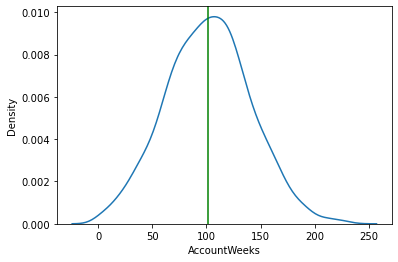

In [466]:
# plot untuk melihat distribusi AccountWeeks jika tidak dibedakan berdasarkan categori
sns.kdeplot(data = dataset, x = "AccountWeeks")
plt.axvline(dataset.AccountWeeks.mean(), 0, 1, color = "g")

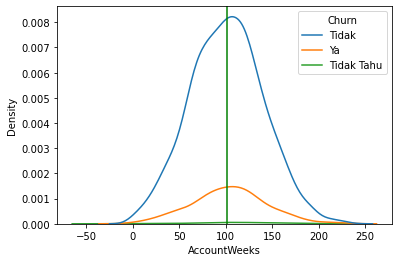

In [467]:
# plot untuk melihat distribusi AccountWeeks jika dibedakan berdasarkan categori
sns.kdeplot(data = dataset, x = "AccountWeeks", hue = "Churn")
plt.axvline(dataset_tidak_churn.AccountWeeks.mean(), 0, 1, color = "g")
plt.axvline(dataset_churn.AccountWeeks.mean(), 0, 1, color = "k")

#### 3.2.4. Visualisasi untuk fitur DataUsage

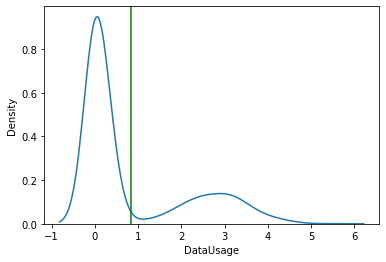

In [468]:
# plot untuk melihat distribusi DataUsage jika tidak dibedakan berdasarkan categori
sns.kdeplot(data = dataset, x = "DataUsage")
plt.axvline(dataset.DataUsage.mean(), 0, 1, color = "g")

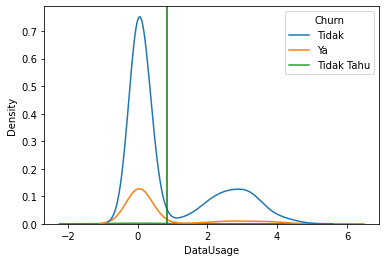

In [469]:
# plot untuk melihat distribusi DataUsage jika dibedakan berdasarkan categori
sns.kdeplot(data = dataset, x = "DataUsage", hue = "Churn")
plt.axvline(dataset_tidak_churn.DataUsage.mean(), 0, 1, color = "g")
plt.axvline(dataset_churn.DataUsage.mean(), 0, 1, color = "k")

#### 3.2.5. Visualisasi untuk fitur CustServCalls

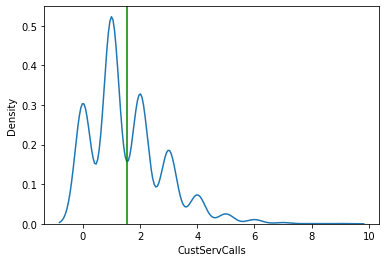

In [470]:
# plot untuk melihat distribusi CustServCalls jika tidak dibedakan berdasarkan categori
sns.kdeplot(data = dataset, x = "CustServCalls")
plt.axvline(dataset.CustServCalls.mean(), 0, 1, color = "g")

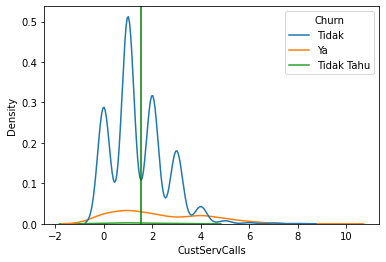

In [471]:
# plot untuk melihat distribusi CustServCalls jika dibedakan berdasarkan categori
sns.kdeplot(data = dataset, x = "CustServCalls", hue = "Churn")
plt.axvline(dataset_tidak_churn.CustServCalls.mean(), 0, 1, color = "g")
plt.axvline(dataset_churn.CustServCalls.mean(), 0, 1, color = "k")

#### 3.2.6. Visualisasi untuk fitur DayMins

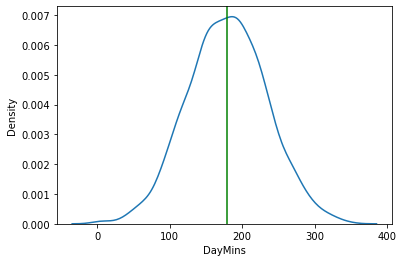

In [472]:
# plot untuk melihat distribusi DayMins jika tidak dibedakan berdasarkan categori
sns.kdeplot(data = dataset, x = "DayMins")
plt.axvline(dataset.DayMins.mean(), 0, 1, color = "g")

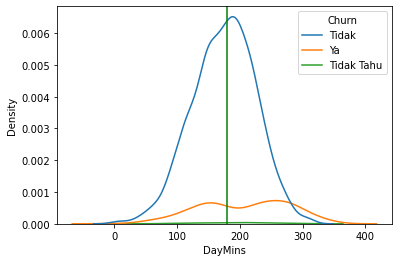

In [473]:
# plot untuk melihat distribusi DayMins jika dibedakan berdasarkan categori
sns.kdeplot(data = dataset, x = "DayMins", hue = "Churn")
plt.axvline(dataset_tidak_churn.DayMins.mean(), 0, 1, color = "g")
plt.axvline(dataset_churn.DayMins.mean(), 0, 1, color = "k")

#### 3.2.7. Visualisasi untuk fitur DayCalls

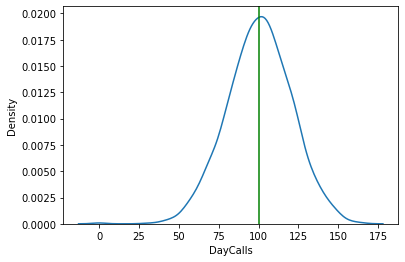

In [474]:
# plot untuk melihat distribusi DayMins jika tidak dibedakan berdasarkan categori
sns.kdeplot(data = dataset, x = "DayCalls")
plt.axvline(dataset.DayCalls.mean(), 0, 1, color = "g")

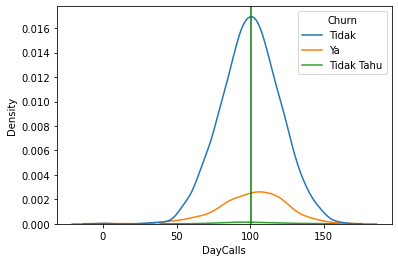

In [475]:
# plot untuk melihat distribusi DayCalls jika dibedakan berdasarkan categori
sns.kdeplot(data = dataset, x = "DayCalls", hue = "Churn")
plt.axvline(dataset_tidak_churn.DayCalls.mean(), 0, 1, color = "g")
plt.axvline(dataset_churn.DayCalls.mean(), 0, 1, color = "k")

#### 3.2.8. Visualisasi untuk fitur MonthlyCharge

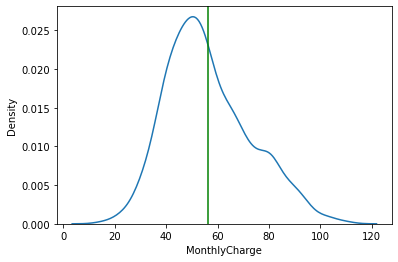

In [476]:
# plot untuk melihat distribusi MonthlyCharge jika tidak dibedakan berdasarkan categori
sns.kdeplot(data = dataset, x = "MonthlyCharge")
plt.axvline(dataset.MonthlyCharge.mean(), 0, 1, color = "g")

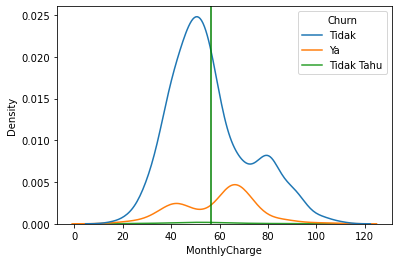

In [477]:
# plot untuk melihat distribusi MonthlyCharge jika dibedakan berdasarkan categori
sns.kdeplot(data = dataset, x = "MonthlyCharge", hue = "Churn")
plt.axvline(dataset_tidak_churn.MonthlyCharge.mean(), 0, 1, color = "g")
plt.axvline(dataset_churn.MonthlyCharge.mean(), 0, 1, color = "k")

#### 3.2.9. Visualisasi untuk fitur OverageFee

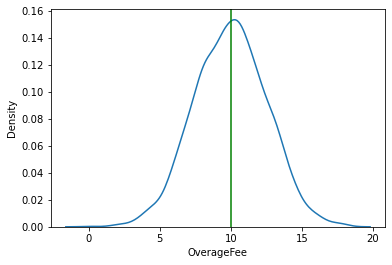

In [478]:
# plot untuk melihat distribusi OverageFee jika tidak dibedakan berdasarkan categori
sns.kdeplot(data = dataset, x = "OverageFee")
plt.axvline(dataset.OverageFee.mean(), 0, 1, color = "g")

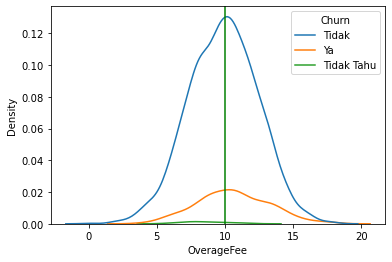

In [479]:
# plot untuk melihat distribusi OverageFee jika dibedakan berdasarkan categori
sns.kdeplot(data = dataset, x = "OverageFee", hue = "Churn")
plt.axvline(dataset_tidak_churn.OverageFee.mean(), 0, 1, color = "g")
plt.axvline(dataset_churn.OverageFee.mean(), 0, 1, color = "k")

#### 3.2.10. Visualisasi untuk fitur RoamMins

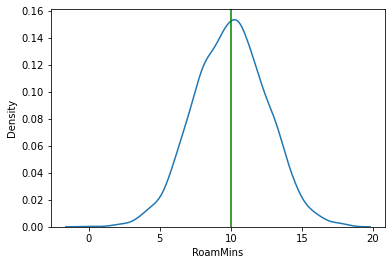

In [480]:
# plot untuk melihat distribusi RoamMins jika tidak dibedakan berdasarkan categori
sns.kdeplot(data = dataset, x = "RoamMins")
plt.axvline(dataset.RoamMins.mean(), 0, 1, color = "g")

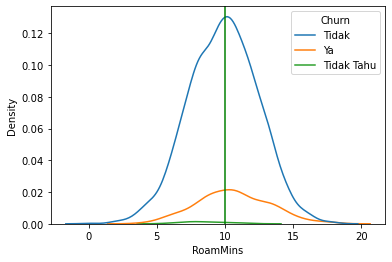

In [481]:
# plot untuk melihat distribusi RoamMins jika dibedakan berdasarkan categori
sns.kdeplot(data = dataset, x = "RoamMins", hue = "Churn")
plt.axvline(dataset_tidak_churn.RoamMins.mean(), 0, 1, color = "g")
plt.axvline(dataset_churn.RoamMins.mean(), 0, 1, color = "k")

#### 3.2.11. Pearson Corrlation

<AxesSubplot:>

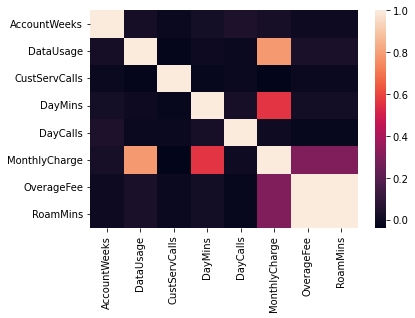

In [482]:
sns.heatmap(dataset.corr())

#### 3.2.12. T Test untuk AccountWeeks

In [483]:
# h0    = mean AccountWeeks untuk kelas 0 = mean AccountWeeks untuk kelas 1
# h1    = mean AccountWeeks untuk kelas 0 != mean AccountWeeks untuk kelas 1

In [484]:
# perform t-test untuk 2 variabel
scs.ttest_ind(
    dataset_churn[dataset_churn.AccountWeeks.isnull() != True].AccountWeeks,
    dataset_tidak_churn[dataset_tidak_churn.AccountWeeks.isnull() != True].AccountWeeks
)

Ttest_indResult(statistic=nan, pvalue=nan)

In [485]:
# nilai t critical untuk alpha 0.05
scs.t.ppf(0.05, df = (len(dataset) - 2))

-1.6455075860232058

In [486]:
# dengan nilai t-value > t-critical dan nilai p-value > 0.05 maka h0 di terima
# mean antara kelas 0 dan kelas 1 untuk AccountWeeks sama

#### 3.2.13. T Test untuk DataUsage

In [487]:
# perform t-test untuk 2 variabel
scs.ttest_ind(
    dataset_churn[dataset_churn.DataUsage.isnull() != True].DataUsage,
    dataset_tidak_churn[dataset_tidak_churn.DataUsage.isnull() != True].DataUsage
)

Ttest_indResult(statistic=nan, pvalue=nan)

In [488]:
# nilai t critical untuk alpha 0.05
scs.t.ppf(0.05, df = (len(dataset) - 2))

-1.6455075860232058

In [489]:
# dengan nilai t-value < t-critical dan nilai p-value <0.05 maka h0 di tolak
# mean antara kelas 0 dan kelas 1 untuk DataUsage statistically significant

#### 3.2.14. T Test untuk CustServCalls

In [490]:
# perform t-test untuk 2 variabel
scs.ttest_ind(
    dataset_churn[dataset_churn.CustServCalls.isnull() != True].CustServCalls,
    dataset_tidak_churn[dataset_tidak_churn.CustServCalls.isnull() != True].CustServCalls
)

Ttest_indResult(statistic=nan, pvalue=nan)

In [491]:
# nilai t critical untuk alpha 0.05
scs.t.ppf(0.05, df = (len(dataset) - 2))

-1.6455075860232058

In [492]:
# dengan nilai t-value < t-critical dan nilai p-value <0.05 maka h0 di tolak
# mean antara kelas 0 dan kelas 1 untuk CustServCalls statistically significant

#### 3.2.15. T Test untuk DayMins

In [493]:
# perform t-test untuk 2 variabel
scs.ttest_ind(
    dataset_churn[dataset_churn.DayMins.isnull() != True].DayMins,
    dataset_tidak_churn[dataset_tidak_churn.DayMins.isnull() != True].DayMins
)

Ttest_indResult(statistic=nan, pvalue=nan)

In [494]:
# nilai t critical untuk alpha 0.05
scs.t.ppf(0.05, df = (len(dataset) - 2))

-1.6455075860232058

In [495]:
# dengan nilai t-value < t-critical dan nilai p-value <0.05 maka h0 di tolak
# mean antara kelas 0 dan kelas 1 untuk DayMins statistically significant

#### 3.2.16. T Test untuk DayCalls

In [496]:
# perform t-test untuk 2 variabel
scs.ttest_ind(
    dataset_churn[dataset_churn.DayCalls.isnull() != True].DayCalls,
    dataset_tidak_churn[dataset_tidak_churn.DayCalls.isnull() != True].DayCalls
)

Ttest_indResult(statistic=nan, pvalue=nan)

In [497]:
# nilai t critical untuk alpha 0.05
scs.t.ppf(0.05, df = (len(dataset) - 2))

-1.6455075860232058

In [498]:
# dengan nilai t-value > t-critical dan nilai p-value > 0.05 maka h0 di terima
# mean antara kelas 0 dan kelas 1 untuk DayCalls sama

#### 3.2.17. T Test untuk MonthlyCharge

In [499]:
# perform t-test untuk 2 variabel
scs.ttest_ind(
    dataset_churn[dataset_churn.MonthlyCharge.isnull() != True].MonthlyCharge,
    dataset_tidak_churn[dataset_tidak_churn.MonthlyCharge.isnull() != True].MonthlyCharge
)

Ttest_indResult(statistic=nan, pvalue=nan)

In [500]:
# nilai t critical untuk alpha 0.05
scs.t.ppf(0.05, df = (len(dataset) - 2))

-1.6455075860232058

In [501]:
# dengan nilai t-value < t-critical dan nilai p-value <0.05 maka h0 di tolak
# mean antara kelas 0 dan kelas 1 untuk MonthlyCharge statistically significant

#### 3.2.18. T Test untuk OverageFee

In [502]:
# perform t-test untuk 2 variabel
scs.ttest_ind(
    dataset_churn[dataset_churn.OverageFee.isnull() != True].OverageFee,
    dataset_tidak_churn[dataset_tidak_churn.OverageFee.isnull() != True].OverageFee
)

Ttest_indResult(statistic=nan, pvalue=nan)

In [503]:
# nilai t critical untuk alpha 0.05
scs.t.ppf(0.05, df = (len(dataset) - 2))

-1.6455075860232058

In [504]:
# dengan nilai t-value < t-critical dan nilai p-value <0.05 maka h0 di tolak
# mean antara kelas 0 dan kelas 1 untuk OverageFee statistically significant

#### 3.2.19. T Test untuk RoamMins

In [505]:
# perform t-test untuk 2 variabel
scs.ttest_ind(
    dataset_churn[dataset_churn.RoamMins.isnull() != True].RoamMins,
    dataset_tidak_churn[dataset_tidak_churn.RoamMins.isnull() != True].RoamMins
)

Ttest_indResult(statistic=nan, pvalue=nan)

In [506]:
# nilai t critical untuk alpha 0.05
scs.t.ppf(0.05, df = (len(dataset) - 2))

-1.6455075860232058

In [507]:
# dengan nilai t-value < t-critical dan nilai p-value <0.05 maka h0 di tolak
# mean antara kelas 0 dan kelas 1 untuk RoamMins statistically significant

### 3.3. Cek Imbalance Label

In [508]:
dataset.Churn.value_counts()

Tidak         1980
Ya             338
Tidak Tahu      15
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='Count'>

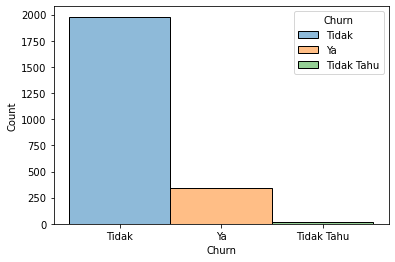

In [509]:
sns.histplot(data = dataset, x = "Churn", hue = "Churn")

### 3.4. Cek Outliers

<AxesSubplot:xlabel='AccountWeeks'>

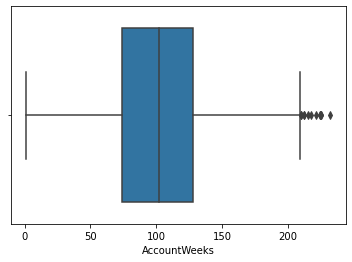

In [510]:
sns.boxplot(data = dataset, x = "AccountWeeks")

<AxesSubplot:xlabel='DataUsage'>

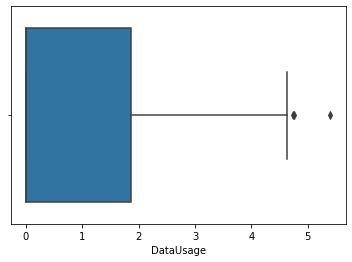

In [511]:
sns.boxplot(data = dataset, x = "DataUsage")

<AxesSubplot:xlabel='CustServCalls'>

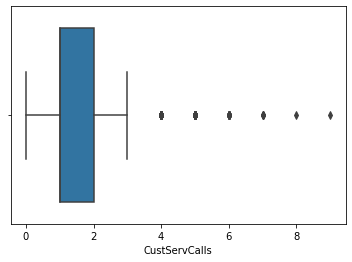

In [512]:
sns.boxplot(data = dataset, x = "CustServCalls")

<AxesSubplot:xlabel='DayMins'>

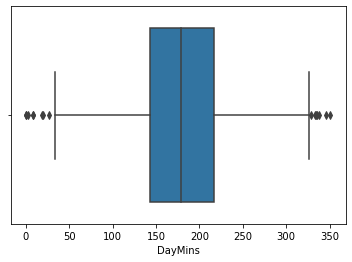

In [513]:
sns.boxplot(data = dataset, x = "DayMins")

<AxesSubplot:xlabel='DayCalls'>

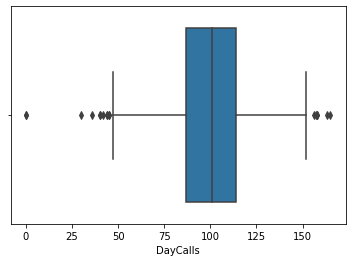

In [514]:
sns.boxplot(data = dataset, x = "DayCalls")

<AxesSubplot:xlabel='MonthlyCharge'>

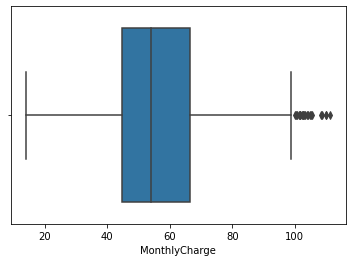

In [515]:
sns.boxplot(data = dataset, x = "MonthlyCharge")

<AxesSubplot:xlabel='OverageFee'>

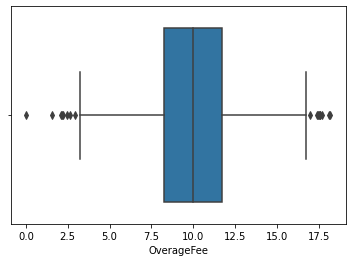

In [516]:
sns.boxplot(data = dataset, x = "OverageFee")

<AxesSubplot:xlabel='RoamMins'>

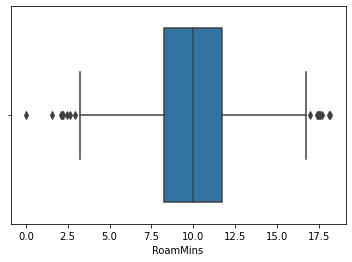

In [517]:
sns.boxplot(data = dataset, x = "RoamMins")

## 4. Kesimpulan

1. Missing value handling
1.1. AccountWeeks   : mean kelas
1.2. DataUsage      : mean kelas
1.3. CustServCalls  : mean
1.4. DayMins        : median
1.5. DayCalls       : median
1.7. MonthlyCharge  : median
1.8. OverageFee     : median
1.9. RoamMins       : median

2. Balancing label Yes dan No

3. Outlier removal

In [518]:
dataset.columns

Index(['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins', 'Churn'],
      dtype='object')

_______________________________________________________________________________________________________________________________

# C. Preprocessing & Feature Engineering

In [519]:
!pip install imblearn

In [520]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scs
import joblib
import yaml
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

## 1. Import Params

In [521]:
params_dir = "config/params.yaml"

In [522]:
def load_params(param_dir):
    with open(param_dir, "r") as file:
        params = yaml.safe_load(file)
        
    return params

In [523]:
def params_updater(key, value, params, params_dir):
    params = params.copy()
    params[key] = value

    with open(params_dir, "w") as file:
        yaml.dump(params, file)
    
    params = load_params(params_dir)

    return params

In [524]:
params = load_params(params_dir)

## 2. Load Dataset

In [527]:
x_train = joblib.load("data/processed/x_train.pkl")
y_train = joblib.load("data/processed/y_train.pkl")

x_valid = joblib.load("data/processed/x_valid.pkl")
y_valid = joblib.load("data/processed/y_valid.pkl")

x_test = joblib.load("data/processed/x_test.pkl")
y_test = joblib.load("data/processed/y_test.pkl")

In [528]:
dataset = pd.concat([x_train, y_train], axis = 1)

valid_set = pd.concat([x_valid, y_valid], axis = 1)

test_set = pd.concat([x_test, y_test], axis = 1)

## 3. Join Categories

In [525]:
def join_cat(set_data, params):
    if params["label"] in set_data.columns.to_list():
        set_data = set_data.copy()
        set_data.Churn.replace(params["label_categories"][1], params["label_categories"][2], inplace = True)
        set_data.Churn.replace(params["label_categories"][2], params["label_categories_new"][1], inplace = True)
        return set_data
    else:
        raise RuntimeError("Kolom label tidak terdeteksi pada set data yang diberikan!")

In [526]:
params = params_updater("label", "Churn", params, params_dir)
params = params_updater("label_categories", ["Ya", "Tidak", "Tidak Tahu"], params, params_dir)
params = params_updater("label_categories_new", ["Ya", "Tidak"], params, params_dir)

### 3.1. Train set

In [529]:
dataset.Churn.value_counts()

Tidak         1980
Ya             338
Tidak Tahu      15
Name: Churn, dtype: int64

In [530]:
dataset = join_cat(dataset, params)

In [531]:
dataset.Churn.value_counts()

Tidak    1995
Ya        338
Name: Churn, dtype: int64

### 3.2. Valid set

In [532]:
valid_set.Churn.value_counts()

Tidak         424
Ya             73
Tidak Tahu      3
Name: Churn, dtype: int64

In [533]:
valid_set = join_cat(valid_set, params)

In [534]:
valid_set.Churn.value_counts()

Tidak    427
Ya        73
Name: Churn, dtype: int64

### 3.3. Test set

In [535]:
test_set.Churn.value_counts()

Tidak         424
Ya             72
Tidak Tahu      4
Name: Churn, dtype: int64

In [536]:
test_set = join_cat(test_set, params)

In [537]:
test_set.Churn.value_counts()

Tidak    428
Ya        72
Name: Churn, dtype: int64

## 5. Handling Missing Value

In [538]:
def nan_detector(set_data):
    set_data = set_data.copy()
    set_data.replace(-1, np.nan, inplace = True)
    return set_data

### 5.1. Convert -1 to NaN

#### 5.1.1. Trainset

In [539]:
dataset.describe()

,AccountWeeks,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000
mean,101.704243,0.833463,1.545649,178.580454,100.439777,56.314273,9.948191,9.948191
std,39.441262,1.287798,1.297575,56.105143,20.473373,16.610233,2.632669,2.632669
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,74.000000,0.000000,1.000000,142.300000,87.000000,44.300000,8.210000,8.210000
50%,102.000000,0.000000,1.000000,179.100000,101.000000,54.000000,10.000000,10.000000
75%,128.000000,1.860000,2.000000,216.800000,114.000000,66.500000,11.700000,11.700000
max,232.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,18.190000


In [540]:
dataset.isnull().sum()

AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
Churn              0
dtype: int64

In [543]:
dataset = nan_detector(dataset)

In [544]:
dataset.isnull().sum()

AccountWeeks        0
ContractRenewal     0
DataPlan            0
DataUsage           5
CustServCalls       1
DayMins            11
DayCalls            1
MonthlyCharge       1
OverageFee          8
RoamMins            8
Churn               0
dtype: int64

#### 5.1.2. Validset

In [545]:
valid_set.describe()

,AccountWeeks,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,100.100000,0.713840,1.668000,181.438600,100.982000,55.721800,10.064700,10.064700
std,41.198065,1.228724,1.364368,54.317452,19.596881,16.640159,2.583183,2.583183
min,-1.000000,-1.000000,0.000000,-1.000000,35.000000,-1.000000,-1.000000,-1.000000
25%,73.750000,0.000000,1.000000,146.725000,87.000000,45.000000,8.400000,8.400000
50%,99.000000,0.000000,1.000000,179.200000,102.000000,52.000000,10.015000,10.015000
75%,127.000000,0.392500,2.000000,215.700000,115.000000,65.000000,11.962500,11.962500
max,217.000000,4.350000,9.000000,346.800000,160.000000,108.700000,17.070000,17.070000


In [546]:
valid_set.isnull().sum()

AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
Churn              0
dtype: int64

In [547]:
valid_set = nan_detector(valid_set)

In [548]:
valid_set.isnull().sum()

AccountWeeks       1
ContractRenewal    0
DataPlan           0
DataUsage          2
CustServCalls      0
DayMins            2
DayCalls           0
MonthlyCharge      1
OverageFee         2
RoamMins           2
Churn              0
dtype: int64

#### 5.1.3. Testset

In [549]:
test_set.describe()

,AccountWeeks,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,500.00000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,98.85000,0.814560,1.536000,178.80500,99.602000,56.590000,10.265060,10.265060
std,40.43307,1.258735,1.349202,54.32171,19.079089,15.745866,2.479557,2.479557
min,1.00000,-1.000000,0.000000,12.50000,42.000000,17.000000,-1.000000,-1.000000
25%,71.00000,0.000000,1.000000,144.20000,88.000000,46.000000,8.690000,8.690000
50%,97.00000,0.000000,1.000000,180.20000,99.500000,53.550000,10.380000,10.380000
75%,126.25000,1.860000,2.000000,215.70000,112.000000,66.000000,11.845000,11.845000
max,243.00000,4.590000,7.000000,329.80000,158.000000,104.900000,16.800000,16.800000


In [550]:
test_set.isnull().sum()

AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
Churn              0
dtype: int64

In [551]:
test_set = nan_detector(test_set)

In [552]:
test_set.isnull().sum()

AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          2
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         1
RoamMins           1
Churn              0
dtype: int64

### 5.2. Handling in AccountWeeks

#### 5.2.1. Trainset

In [553]:
impute_1 = int(dataset[dataset.Churn == "Ya"].AccountWeeks.mean())
impute_0 = int(dataset[dataset.Churn == "Tidak"].AccountWeeks.mean())

In [554]:
impute_1, impute_0

(103, 101)

In [555]:
params = params_updater("missing_value_AccountWeeks", {"Ya": 103, "Tidak": 101}, params, params_dir)

In [556]:
dataset[dataset.Churn == "Ya"].AccountWeeks.isnull().sum(), dataset[dataset.AccountWeeks == "Tidak"].AccountWeeks.isnull().sum()

(0, 0)

In [557]:
dataset.loc[dataset[(dataset.Churn == "Ya") & (dataset.AccountWeeks.isnull() == True)].index, "AccountWeeks"] = impute_1
dataset.loc[dataset[(dataset.Churn == "Tidak") & (dataset.AccountWeeks.isnull() == True)].index, "AccountWeeks"] = impute_0

In [558]:
dataset[dataset.Churn == "Ya"].AccountWeeks.isnull().sum(), dataset[dataset.AccountWeeks == "Tidak"].AccountWeeks.isnull().sum()

(0, 0)

#### 5.2.2. Validset

In [559]:
valid_set[valid_set.Churn == "Ya"].AccountWeeks.isnull().sum(), valid_set[valid_set.Churn == "Tidak"].AccountWeeks.isnull().sum()

(0, 1)

In [560]:
valid_set.loc[valid_set[(valid_set.Churn == "Ya") & (valid_set.AccountWeeks.isnull() == True)].index, "AccountWeeks"] = impute_1
valid_set.loc[valid_set[(valid_set.Churn == "Tidak") & (valid_set.AccountWeeks.isnull() == True)].index, "AccountWeeks"] = impute_0

In [561]:
valid_set[valid_set.Churn == "Ya"].AccountWeeks.isnull().sum(), valid_set[valid_set.Churn == "Tidak"].AccountWeeks.isnull().sum()

(0, 0)

#### 5.2.3. Testset

In [562]:
test_set[test_set.Churn == "Ya"].AccountWeeks.isnull().sum(), test_set[test_set.Churn == "No"].AccountWeeks.isnull().sum()

(0, 0)

In [563]:
test_set.loc[test_set[(test_set.Churn == "Ya") & (test_set.AccountWeeks.isnull() == True)].index, "AccountWeeks"] = impute_1
test_set.loc[test_set[(test_set.Churn == "Tidak") & (test_set.AccountWeeks.isnull() == True)].index, "AccountWeeks"] = impute_0

In [564]:
test_set[test_set.Churn == "Ya"].AccountWeeks.isnull().sum(), test_set[test_set.Churn == "Tidak"].AccountWeeks.isnull().sum()

(0, 0)

### 5.3. Handling in DataUsage          

#### 5.3.1. Training

In [565]:
impute_1 = dataset[dataset.Churn == "Ya"].DataUsage.mean()
impute_0 = dataset[dataset.Churn == "Tidak"].DataUsage.mean()

In [566]:
impute_1, impute_0

(0.5436498516320476, 0.8871220492214963)

In [567]:
params = params_updater("missing_value_DataUsage", {"Ya": 0.5436498516320476, "Tidak": 0.8882406471183009}, params, params_dir)

In [568]:
dataset[dataset.Churn == "Ya"].DataUsage.isnull().sum(), dataset[dataset.Churn == "Tidak"].DataUsage.isnull().sum()

(1, 4)

In [569]:
dataset.loc[dataset[(dataset.Churn == "Ya") & (dataset.DataUsage.isnull() == True)].index, "DataUsage"] = impute_1
dataset.loc[dataset[(dataset.Churn == "Tidak") & (dataset.DataUsage.isnull() == True)].index, "DataUsage"] = impute_0

In [570]:
dataset[dataset.Churn == "Ya"].DataUsage.isnull().sum(), dataset[dataset.Churn == "Tidak"].DataUsage.isnull().sum()

(0, 0)

#### 5.3.2. Validset

In [571]:
valid_set[valid_set.Churn == "Ya"].DataUsage.isnull().sum(), valid_set[valid_set.Churn == "Tidak"].DataUsage.isnull().sum()

(0, 2)

In [572]:
valid_set.loc[valid_set[(valid_set.Churn == "Ya") & (valid_set.DataUsage.isnull() == True)].index, "DataUsage"] = impute_1
valid_set.loc[valid_set[(valid_set.Churn == "Tidak") & (valid_set.DataUsage.isnull() == True)].index, "DataUsage"] = impute_0

In [573]:
dataset[dataset.Churn == "Ya"].DataUsage.isnull().sum(), dataset[dataset.Churn == "Tidak"].DataUsage.isnull().sum()

(0, 0)

#### 5.3.3. Testset

In [574]:
test_set[test_set.Churn == "Ya"].DataUsage.isnull().sum(), test_set[test_set.Churn == "Tidak"].DataUsage.isnull().sum()

(0, 2)

In [575]:
test_set.loc[test_set[(test_set.Churn == "Ya") & (test_set.DataUsage.isnull() == True)].index, "DataUsage"] = impute_1
test_set.loc[test_set[(test_set.Churn == "Tidak") & (test_set.DataUsage.isnull() == True)].index, "DataUsage"] = impute_0

In [576]:
test_set[test_set.Churn == "Ya"].DataUsage.isnull().sum(), test_set[test_set.Churn == "Tidak"].DataUsage.isnull().sum()

(0, 0)

### 5.4. Handling in CustServCalls, DayMins, DayCalls, OverageFee dan RoamMins

In [577]:
dataset.columns

Index(['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins', 'Churn'],
      dtype='object')

#### 5.4.1. Trainset

In [578]:
impute_DataUsage = int(dataset.DataUsage.mean())
impute_CustServCalls = int(dataset.CustServCalls.mean())
impute_DayMins = dataset.DayMins.mean()
impute_DayCalls = int(dataset.DayCalls.median())
impute_MonthlyCharge = int(dataset.MonthlyCharge.median())
impute_OverageFee = dataset.OverageFee.median()
impute_RoamMins = dataset.RoamMins.median()

In [579]:
impute_values = {"DataUsage" : impute_DataUsage,"CustServCalls" : impute_CustServCalls, "DayMins" : impute_DayMins, 
                 "DayCalls" : impute_DayCalls, "MonthlyCharge" : impute_MonthlyCharge, "OverageFee" : impute_OverageFee,
                 "RoamMins" : impute_RoamMins}

In [580]:
impute_values

{'DataUsage': 0,
 'CustServCalls': 1,
 'DayMins': 179.43118001722672,
 'DayCalls': 101,
 'MonthlyCharge': 54,
 'OverageFee': 10.01,
 'RoamMins': 10.01}

In [581]:
params = params_updater("missing_value_CustServCalls", 1, params, params_dir)
params = params_updater("missing_value_DayMins", 179.63004735256132, params, params_dir)
params = params_updater("missing_value_DayCalls", 101, params, params_dir)
params = params_updater("missing_value_MonthlyCharge", 53, params, params_dir)
params = params_updater("missing_value_OverageFee", 10.12, params, params_dir)
params = params_updater("missing_value_RoamMins", 10.12, params, params_dir)

In [582]:
dataset.isnull().sum()

AccountWeeks        0
ContractRenewal     0
DataPlan            0
DataUsage           0
CustServCalls       1
DayMins            11
DayCalls            1
MonthlyCharge       1
OverageFee          8
RoamMins            8
Churn               0
dtype: int64

In [583]:
dataset.fillna(value = impute_values, inplace = True)

In [584]:
dataset.isnull().sum()

AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
Churn              0
dtype: int64

#### 5.4.2. Validset

In [585]:
valid_set.isnull().sum()

AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            2
DayCalls           0
MonthlyCharge      1
OverageFee         2
RoamMins           2
Churn              0
dtype: int64

In [586]:
valid_set.fillna(value = impute_values, inplace = True)

In [587]:
valid_set.isnull().sum()

AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
Churn              0
dtype: int64

#### 5.4.3. Testset

In [588]:
test_set.isnull().sum()

AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         1
RoamMins           1
Churn              0
dtype: int64

In [589]:
test_set.fillna(value = impute_values, inplace = True)

In [590]:
test_set.isnull().sum()

AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
Churn              0
dtype: int64

## 6.1. Encoding ContractRenewal

In [591]:
ohe_ContractRenewal = OneHotEncoder(sparse = False)

In [592]:
ohe_ContractRenewal.fit(np.array(params["range_ContractRenewal"]).reshape(-1, 1))

OneHotEncoder(sparse=False)

In [593]:
ohe_ContractRenewal.categories_

[array(['No', 'Yes'], dtype='<U3')]

In [594]:
joblib.dump(ohe_ContractRenewal, "models/ohe_ContractRenewal.pkl")

['models/ohe_ContractRenewal.pkl']

## 6.2. Encoding DataPlan

In [595]:
ohe_DataPlan = OneHotEncoder(sparse = False)

In [596]:
ohe_DataPlan.fit(np.array(params["range_DataPlan"]).reshape(-1, 1))

OneHotEncoder(sparse=False)

In [597]:
ohe_DataPlan.categories_

[array(['No', 'Yes'], dtype='<U3')]

In [598]:
joblib.dump(ohe_ContractRenewal, "models/ohe_DataPlan.pkl")

['models/ohe_DataPlan.pkl']

### 7.1. Trainset ContractRenewal

In [599]:
ContractRenewal_features = ohe_ContractRenewal.transform(np.array(dataset.ContractRenewal.to_list()).reshape(-1, 1))

In [600]:
ContractRenewal_features = pd.DataFrame(ContractRenewal_features, columns = params["range_ContractRenewal"])

In [601]:
ContractRenewal_features.set_index(dataset.index, inplace = True)

In [602]:
dataset = pd.concat([ContractRenewal_features, dataset], axis = 1)

In [603]:
dataset.drop(columns = "ContractRenewal", inplace = True)

### 7.2. Trainset DataPlan

In [604]:
DataPlan_features = ohe_DataPlan.transform(np.array(dataset.DataPlan.to_list()).reshape(-1, 1))

In [605]:
DataPlan_features = pd.DataFrame(DataPlan_features, columns = params["range_DataPlan"])

In [606]:
DataPlan_features.set_index(dataset.index, inplace = True)

In [607]:
dataset = pd.concat([DataPlan_features, dataset], axis = 1)

In [608]:
dataset.drop(columns = "DataPlan", inplace = True)

### 7.3. Validset ContractRenewal

In [609]:
ContractRenewal_features = ohe_ContractRenewal.transform(np.array(valid_set.ContractRenewal.to_list()).reshape(-1, 1))

In [610]:
ContractRenewal_features = pd.DataFrame(ContractRenewal_features, columns = params["range_ContractRenewal"])

In [611]:
ContractRenewal_features.set_index(valid_set.index, inplace = True)

In [612]:
valid_set = pd.concat([ContractRenewal_features, valid_set], axis = 1)

In [613]:
valid_set.drop(columns = "ContractRenewal", inplace = True)

### 7.4. Validset DataPlan

In [614]:
DataPlan_features = ohe_DataPlan.transform(np.array(valid_set.DataPlan.to_list()).reshape(-1, 1))

In [615]:
DataPlan_features = pd.DataFrame(DataPlan_features, columns = params["range_DataPlan"])

In [616]:
DataPlan_features.set_index(valid_set.index, inplace = True)

In [617]:
valid_set = pd.concat([DataPlan_features, valid_set], axis = 1)

In [618]:
valid_set.drop(columns = "DataPlan", inplace = True)

### 7.5. Testset ContractRenewal

In [619]:
ContractRenewal_features = ohe_ContractRenewal.transform(np.array(valid_set.ContractRenewal.to_list()).reshape(-1, 1))

AttributeError: 'DataFrame' object has no attribute 'ContractRenewal'

In [620]:
ContractRenewal_features = pd.DataFrame(ContractRenewal_features, columns = params["range_ContractRenewal"])

In [621]:
ContractRenewal_features.set_index(test_set.index, inplace = True)

In [622]:
test_set = pd.concat([ContractRenewal_features, test_set], axis = 1)

In [623]:
test_set.drop(columns = "ContractRenewal", inplace = True)

### 7.6. Testset DataPlan

In [624]:
DataPlan_features = ohe_DataPlan.transform(np.array(valid_set.DataPlan.to_list()).reshape(-1, 1))

AttributeError: 'DataFrame' object has no attribute 'DataPlan'

In [625]:
DataPlan_features = pd.DataFrame(DataPlan_features, columns = params["range_DataPlan"])

In [626]:
DataPlan_features.set_index(test_set.index, inplace = True)

In [627]:
test_set = pd.concat([DataPlan_features, test_set], axis = 1)

In [628]:
test_set.drop(columns = "DataPlan", inplace = True)

In [629]:
test_set

,No,Yes,No,Yes,AccountWeeks,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Churn
1018,1.0,0.0,0.0,1.0,76,0.00,1,263.4,148,65.0,11.52,11.52,Ya
2337,1.0,0.0,0.0,1.0,139,0.00,4,181.6,119,60.0,16.79,16.79,Tidak
2654,0.0,1.0,0.0,1.0,66,0.00,1,207.7,85,53.0,9.84,9.84,Tidak
1645,1.0,0.0,1.0,0.0,95,3.05,3,283.1,112,103.5,14.31,14.31,Tidak
334,0.0,1.0,0.0,1.0,66,0.00,1,201.3,95,48.0,7.64,7.64,Tidak
...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,1.0,0.0,0.0,1.0,45,0.00,2,112.8,108,38.0,10.94,10.94,Tidak
903,1.0,0.0,0.0,1.0,73,0.00,0,214.2,90,54.0,9.84,9.84,Tidak
1324,1.0,0.0,0.0,1.0,118,0.00,2,154.6,112,42.0,9.21,9.21,Tidak
2724,0.0,1.0,0.0,1.0,182,0.00,2,279.1,124,63.0,9.03,9.03,Ya


## 8. Balancing Label

<AxesSubplot:xlabel='Churn', ylabel='Count'>

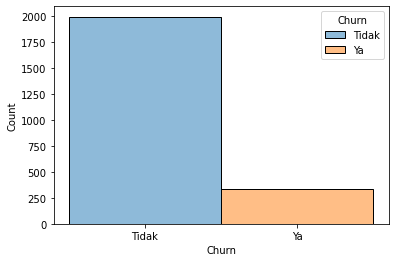

In [630]:
sns.histplot(data = dataset, x = "Churn", hue = "Churn")

### 8.1. Undersampling

In [631]:
rus = RandomUnderSampler(random_state = 26)

In [632]:
x_rus, y_rus = rus.fit_resample(np.array(dataset.drop("Churn", axis = 1)), dataset["Churn"])

In [633]:
dataset_rus = pd.concat([pd.DataFrame(x_rus), y_rus], axis = 1)

<AxesSubplot:xlabel='Churn', ylabel='Count'>

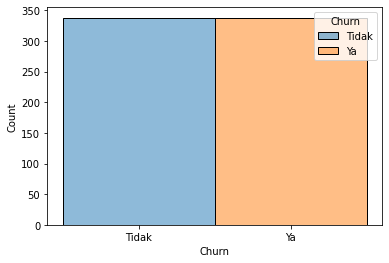

In [634]:
sns.histplot(dataset_rus, x = "Churn", hue = "Churn")

### 8.2. Oversampling

In [635]:
ros = RandomOverSampler(random_state = 11)

In [636]:
x_ros, y_ros = ros.fit_resample(np.array(dataset.drop("Churn", axis = 1)), dataset["Churn"])

In [637]:
dataset_ros = pd.concat([pd.DataFrame(x_ros), y_ros], axis = 1)

<AxesSubplot:xlabel='Churn', ylabel='Count'>

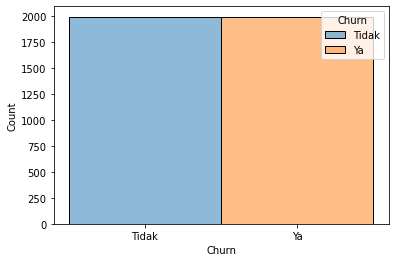

In [638]:
sns.histplot(dataset_ros, x = "Churn", hue = "Churn")

### 8.3. SMOTE

In [639]:
sm = SMOTE(random_state = 112)

In [640]:
x_sm, y_sm = sm.fit_resample(np.array(dataset.drop("Churn", axis = 1)), dataset["Churn"])

In [641]:
dataset_sm = pd.concat([pd.DataFrame(x_sm), y_sm], axis = 1)

<AxesSubplot:xlabel='Churn', ylabel='Count'>

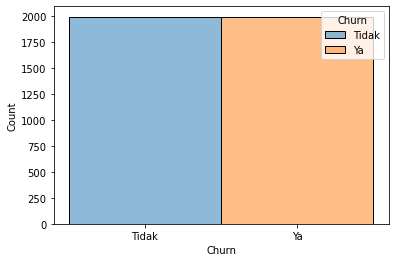

In [642]:
sns.histplot(dataset_sm, x = "Churn", hue = "Churn")

## 9. Label Encoding

In [711]:
le_categori = LabelEncoder()

In [712]:
le_categori.fit(params["label_categories_new"])

LabelEncoder()

In [713]:
joblib.dump(le_categori, "models/le_categori.pkl")

['models/le_categori.pkl']

In [714]:
params["label_categories_new"]

['Ya', 'Tidak']

### 10.1. Undersampling set

In [715]:
tuple(y_rus.unique()) == (params["label_categories_new"][1],params["label_categories_new"][0])

AttributeError: 'numpy.ndarray' object has no attribute 'unique'

In [716]:
y_rus = le_categori.transform(y_rus)

C:\Users\Axel\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [717]:
y_rus

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### 10.2. Oversampling set

In [667]:
tuple(y_ros.unique()) == (params["label_categories_new"][1],params["label_categories_new"][0])

True

In [668]:
y_ros = le_categori.transform(y_ros)

In [669]:
y_ros

array([0, 0, 0, ..., 1, 1, 1])

#### 10.3. SMOTE

#### 10.3.1 Training Set

In [670]:
tuple(y_sm.unique()) == (params["label_categories_new"][1],params["label_categories_new"][0])

True

In [671]:
y_sm = le_categori.transform(y_sm)

In [672]:
y_sm

array([0, 0, 0, ..., 1, 1, 1])

#### 10.3.2 Validation Set

In [678]:
len(set(valid_set.Churn.unique()) - set(params["label_categories_new"])) == 0

True

In [687]:
valid_set.Churn = le_categori.transform(valid_set.Churn)

#### 10.3.3 Test Set

In [689]:
len(set(test_set.Churn.unique()) - set(params["label_categories_new"])) == 0

True

In [690]:
test_set.Churn = le_categori.transform(test_set.Churn)

## 11. Dump Data

In [693]:
joblib.dump(x_rus, "data/processed/x_rus.pkl")
joblib.dump(y_rus, "data/processed/y_rus.pkl")

joblib.dump(x_ros, "data/processed/x_ros.pkl")
joblib.dump(y_ros, "data/processed/y_ros.pkl")

joblib.dump(x_sm, "data/processed/x_sm.pkl")
joblib.dump(y_sm, "data/processed/y_sm.pkl")

joblib.dump(valid_set.drop(columns = "Churn"), "data/processed/x_valid_feng.pkl")
joblib.dump(valid_set.Churn, "data/processed/y_valid_feng.pkl")

joblib.dump(test_set.drop(columns = "Churn"), "data/processed/x_test_feng.pkl")
joblib.dump(test_set.Churn, "data/processed/y_test_feng.pkl")

['data/processed/y_test_feng.pkl']

# D. Modeling
_______________________________________________________________________________________________________________________________

In [698]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [699]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from datetime import datetime
from tqdm import tqdm
import yaml
import joblib
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import hashlib

## 1. Load Dataset

In [700]:
x_rus = joblib.load("data/processed/x_rus.pkl")
y_rus = joblib.load("data/processed/y_rus.pkl")

x_ros = joblib.load("data/processed/x_ros.pkl")
y_ros = joblib.load("data/processed/y_ros.pkl")

x_sm = joblib.load("data/processed/x_sm.pkl")
y_sm = joblib.load("data/processed/y_sm.pkl")

x_valid = joblib.load("data/processed/x_valid_feng.pkl")
y_valid = joblib.load("data/processed/y_valid_feng.pkl")

x_test = joblib.load("data/processed/x_test_feng.pkl")
y_test = joblib.load("data/processed/y_test_feng.pkl")

## 2. Create Log Template

In [701]:
def time_stamp():
    return datetime.now()

In [702]:
def create_log_template():
    logger = {
        "model_name" : [],
        "model_uid" : [],
        "training_time" : [],
        "training_date" : [],
        "performance" : [],
        "f1_score_avg" : [],
        "data_configurations" : [],
    }

    return logger

In [703]:
def training_log_updater(current_log, log_path):
    current_log = current_log.copy()

    try:
        with open(log_path, "r") as file:
            last_log = json.load(file)
        file.close()
    except FileNotFoundError as ffe:
        with open(log_path, "w") as file:
            file.write("[]")
        file.close()
        with open(log_path, "r") as file:
            last_log = json.load(file)
        file.close()
    
    last_log.append(current_log)

    with open(log_path, "w") as file:
        json.dump(last_log, file)
        file.close()

    return last_log

## 2. Training and Evaluation

### 2.1. Create Model Object

In [704]:
lgr_baseline = LogisticRegression()
dct_baseline = DecisionTreeClassifier()
rfc_baseline = RandomForestClassifier()
knn_baseline = KNeighborsClassifier()
xgb_baseline = XGBClassifier()

In [705]:
list_of_model = {
    "undersampling" : [
        { "model_name": lgr_baseline.__class__.__name__, "model_object": lgr_baseline, "model_uid": ""},
        { "model_name": dct_baseline.__class__.__name__, "model_object": dct_baseline, "model_uid": ""},
        { "model_name": rfc_baseline.__class__.__name__, "model_object": rfc_baseline, "model_uid": ""},
        { "model_name": knn_baseline.__class__.__name__, "model_object": knn_baseline, "model_uid": ""},
        { "model_name": xgb_baseline.__class__.__name__, "model_object": xgb_baseline, "model_uid": ""}
        ],
    "oversampling" : [
        { "model_name": lgr_baseline.__class__.__name__, "model_object": lgr_baseline, "model_uid": ""},
        { "model_name": dct_baseline.__class__.__name__, "model_object": dct_baseline, "model_uid": ""},
        { "model_name": rfc_baseline.__class__.__name__, "model_object": rfc_baseline, "model_uid": ""},
        { "model_name": knn_baseline.__class__.__name__, "model_object": knn_baseline, "model_uid": ""},
        { "model_name": xgb_baseline.__class__.__name__, "model_object": xgb_baseline, "model_uid": ""}
        ],
    "smote" : [
        { "model_name": lgr_baseline.__class__.__name__, "model_object": lgr_baseline, "model_uid": ""},
        { "model_name": dct_baseline.__class__.__name__, "model_object": dct_baseline, "model_uid": ""},
        { "model_name": rfc_baseline.__class__.__name__, "model_object": rfc_baseline, "model_uid": ""},
        { "model_name": knn_baseline.__class__.__name__, "model_object": knn_baseline, "model_uid": ""},
        { "model_name": xgb_baseline.__class__.__name__, "model_object": xgb_baseline, "model_uid": ""}
        ],
    }

### 2.2. Training Model

In [707]:
def train_eval_model(list_of_model, prefix_model_name, x_train, y_train, data_configuration_name, x_valid, y_valid, log_path):

    list_of_model = copy.deepcopy(list_of_model)
    logger = create_log_template()

    for model in tqdm(list_of_model):    
        model_name = prefix_model_name + "-" + model["model_name"]

        start_time = time_stamp()
        model["model_object"].fit(x_train, y_train)
        finished_time = time_stamp()

        elapsed_time = finished_time - start_time
        elapsed_time = elapsed_time.total_seconds()

        y_pred = model["model_object"].predict(x_valid)
        performance = classification_report(y_valid, y_pred, output_dict = True)

        plain_id = str(start_time) + str(finished_time)
        chiper_id = hashlib.md5(plain_id.encode()).hexdigest()

        model["model_uid"] = chiper_id

        logger["model_name"].append(model_name)
        logger["model_uid"].append(chiper_id)
        logger["training_time"].append(elapsed_time)
        logger["training_date"].append(str(start_time))
        logger["performance"].append(performance)
        logger["f1_score_avg"].append(performance["macro avg"]["f1-score"])
        logger["data_configurations"].append(data_configuration_name)

    training_log = training_log_updater(logger, log_path)

    return training_log, list_of_model

#### 2.2.1. Baseline Model Undersampling

In [719]:
training_log, list_of_model_rus = train_eval_model(
    list_of_model["undersampling"],
    "baseline_model",
    x_rus,
    y_rus,
    "undersampling",
    x_valid,
    y_valid,
    "log/training_log.json"
)

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]C:\Users\Axel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Axel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\Axel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\Axel\anaconda3\

In [720]:
list_of_model["undersampling"] = copy.deepcopy(list_of_model_rus)

#### 2.2.2. Baseline Model Oversampling

In [721]:
training_log, list_of_model_ros = train_eval_model(
    list_of_model["oversampling"],
    "baseline_model",
    x_rus,
    y_rus,
    "oversampling",
    x_valid,
    y_valid,
    "log/training_log.json"
)

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]C:\Users\Axel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Axel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\Axel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\Axel\anaconda3\

In [722]:
list_of_model["oversampling"] = copy.deepcopy(list_of_model_ros)

#### 2.2.2. Baseline Model SMOTE

In [723]:
training_log, list_of_model_sm = train_eval_model(
    list_of_model["smote"],
    "baseline_model",
    x_rus,
    y_rus,
    "smote",
    x_valid,
    y_valid,
    "log/training_log.json"
)

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]C:\Users\Axel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Axel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\Axel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\Axel\anaconda3\

#### 2.3.4. Best Performance

In [724]:
def training_log_to_df(training_log):
    training_res = pd.DataFrame()

    for log in tqdm(training_log):
        training_res = pd.concat([training_res, pd.DataFrame(log)])
    
    training_res.sort_values(["f1_score_avg", "training_time"], ascending = [False, True], inplace = True)
    training_res.reset_index(inplace = True, drop = True)
    
    return training_res

In [725]:
training_res = training_log_to_df(training_log)

100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 678.73it/s]


In [726]:
training_res

,model_name,model_uid,training_time,training_date,performance,f1_score_avg,data_configurations
0,baseline_model-RandomForestClassifier,11c4618cda422c21e9209bb4b5b1638e,0.194324,2022-12-01 06:21:49.142291,"{'0': {'precision': 0.958974358974359, 'recall...",0.769248,undersampling
1,baseline_model-RandomForestClassifier,4ff158830536c17d44d0a6a524b9b125,0.194422,2022-12-01 06:23:42.380017,"{'0': {'precision': 0.9634464751958225, 'recal...",0.766082,smote
2,baseline_model-RandomForestClassifier,439aa907cecd713acab9a4d73de46476,0.162833,2022-12-01 06:22:41.863543,"{'0': {'precision': 0.9633507853403142, 'recal...",0.763783,oversampling
3,baseline_model-XGBClassifier,b27facad544ab1869a1d7f669370b101,0.054615,2022-12-01 06:21:49.375282,"{'0': {'precision': 0.9522546419098143, 'recal...",0.727130,undersampling
4,baseline_model-XGBClassifier,069acbf10f468677bb75f9da36cc4133,0.057800,2022-12-01 06:23:42.613246,"{'0': {'precision': 0.9522546419098143, 'recal...",0.727130,smote
5,baseline_model-XGBClassifier,f8ceb5fa24585e8f8a01b9bffa662263,0.097911,2022-12-01 06:22:42.080227,"{'0': {'precision': 0.9522546419098143, 'recal...",0.727130,oversampling
6,baseline_model-DecisionTreeClassifier,819f49cd613b871c67fc5b265f274bdd,0.004000,2022-12-01 06:22:41.854543,"{'0': {'precision': 0.9571428571428572, 'recal...",0.691235,oversampling
7,baseline_model-DecisionTreeClassifier,a946c90508457043f99b55696ae1bb90,0.003000,2022-12-01 06:21:49.135288,"{'0': {'precision': 0.9463276836158192, 'recal...",0.675513,undersampling
8,baseline_model-DecisionTreeClassifier,028a2a1f0a66a87680e6c9cab68e49dc,0.002997,2022-12-01 06:23:42.372020,"{'0': {'precision': 0.9510086455331412, 'recal...",0.674144,smote
9,baseline_model-LogisticRegression,0601b576363d11242f748bf531714a96,0.014559,2022-12-01 06:22:41.834975,"{'0': {'precision': 0.9384615384615385, 'recal...",0.619295,oversampling


In [727]:
def get_best_model(training_log_df, list_of_model):
    model_object = None

    best_model_info = training_log_df.sort_values(["f1_score_avg", "training_time"], ascending = [False, True]).iloc[0]
    
    for configuration_data in list_of_model:
        for model_data in list_of_model[configuration_data]:
            if model_data["model_uid"] == best_model_info["model_uid"]:
                model_object = model_data["model_object"]
                break
    
    if model_object == None:
        raise RuntimeError("The best model not found in your list of model.")
    
    return model_object
    

In [728]:
model = get_best_model(training_res, list_of_model)

In [729]:
model

RandomForestClassifier()

In [730]:
joblib.dump(model, "models/model.pkl")

['models/model.pkl']

#### 2.2.5. Hyperparameter Tuning

In [731]:
dist_params_knn = {
    "algorithm" : ["ball_tree", "kd_tree", "brute"],
    "n_neighbors" : [2, 3, 4, 5, 6, 10, 15, 20, 25],
    "leaf_size" : [2, 3, 4, 5, 6, 10, 15, 20, 25],
}

In [732]:
knn_enh = GridSearchCV(KNeighborsClassifier(), dist_params_knn, n_jobs = -1, verbose = 420)

In [733]:
list_of_model["undersampling"].append({"model_name": knn_enh.__class__.__name__ + "-" + knn_enh.estimator.__class__.__name__, "model_object": copy.deepcopy(knn_enh), "model_uid": ""})
list_of_model["oversampling"].append({"model_name": knn_enh.__class__.__name__ + "-" + knn_enh.estimator.__class__.__name__, "model_object": copy.deepcopy(knn_enh), "model_uid": ""})
list_of_model["smote"].append({"model_name": knn_enh.__class__.__name__ + "-" + knn_enh.estimator.__class__.__name__, "model_object": copy.deepcopy(knn_enh), "model_uid": ""})

In [734]:
training_log, list_of_model_rus_hyp = train_eval_model(
    [list_of_model["undersampling"][-1]],
    "hyperparams",
    x_rus,
    y_rus,
    "undersampling",
    x_valid,
    y_valid,
    "log/training_log.json"
)


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


C:\Users\Axel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.92s/it]


In [735]:
list_of_model["undersampling"][-1] = copy.deepcopy(list_of_model_rus_hyp[0])

In [736]:
list_of_model["undersampling"][-1]

{'model_name': 'GridSearchCV-KNeighborsClassifier',
 'model_object': GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
              param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'leaf_size': [2, 3, 4, 5, 6, 10, 15, 20, 25],
                          'n_neighbors': [2, 3, 4, 5, 6, 10, 15, 20, 25]},
              verbose=420),
 'model_uid': '63b5dbe309cfb6bd59b51d24c0807c66'}

In [737]:
training_log_to_df(training_log)

100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 799.11it/s]


,model_name,model_uid,training_time,training_date,performance,f1_score_avg,data_configurations
0,baseline_model-RandomForestClassifier,11c4618cda422c21e9209bb4b5b1638e,0.194324,2022-12-01 06:21:49.142291,"{'0': {'precision': 0.958974358974359, 'recall...",0.769248,undersampling
1,baseline_model-RandomForestClassifier,4ff158830536c17d44d0a6a524b9b125,0.194422,2022-12-01 06:23:42.380017,"{'0': {'precision': 0.9634464751958225, 'recal...",0.766082,smote
2,baseline_model-RandomForestClassifier,439aa907cecd713acab9a4d73de46476,0.162833,2022-12-01 06:22:41.863543,"{'0': {'precision': 0.9633507853403142, 'recal...",0.763783,oversampling
3,baseline_model-XGBClassifier,b27facad544ab1869a1d7f669370b101,0.054615,2022-12-01 06:21:49.375282,"{'0': {'precision': 0.9522546419098143, 'recal...",0.727130,undersampling
4,baseline_model-XGBClassifier,069acbf10f468677bb75f9da36cc4133,0.057800,2022-12-01 06:23:42.613246,"{'0': {'precision': 0.9522546419098143, 'recal...",0.727130,smote
5,baseline_model-XGBClassifier,f8ceb5fa24585e8f8a01b9bffa662263,0.097911,2022-12-01 06:22:42.080227,"{'0': {'precision': 0.9522546419098143, 'recal...",0.727130,oversampling
6,baseline_model-DecisionTreeClassifier,819f49cd613b871c67fc5b265f274bdd,0.004000,2022-12-01 06:22:41.854543,"{'0': {'precision': 0.9571428571428572, 'recal...",0.691235,oversampling
7,baseline_model-DecisionTreeClassifier,a946c90508457043f99b55696ae1bb90,0.003000,2022-12-01 06:21:49.135288,"{'0': {'precision': 0.9463276836158192, 'recal...",0.675513,undersampling
8,baseline_model-DecisionTreeClassifier,028a2a1f0a66a87680e6c9cab68e49dc,0.002997,2022-12-01 06:23:42.372020,"{'0': {'precision': 0.9510086455331412, 'recal...",0.674144,smote
9,baseline_model-LogisticRegression,0601b576363d11242f748bf531714a96,0.014559,2022-12-01 06:22:41.834975,"{'0': {'precision': 0.9384615384615385, 'recal...",0.619295,oversampling


#### 2.2.6. Take a Look at Confusion Matrix

In [738]:
y_pred = model.predict(x_valid)

C:\Users\Axel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


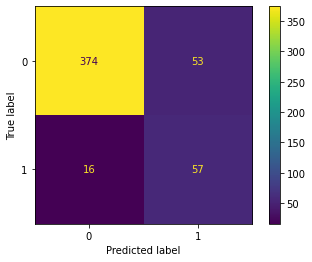

In [739]:
ConfusionMatrixDisplay.from_predictions(y_valid, y_pred)